In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
customerprod = pd.read_csv('prepared_data/CustomerProd.csv',
                           usecols=['customer_id','product','signup_date_time','cancel_date_time'],
                           dtype={'customer_id': str,
                                  'product':str,
                                  'signup_date_time': str,
                                  'cancel_date_time':str})
customerprod['signup_date_time'] = pd.to_datetime(customerprod['signup_date_time'])
customerprod['cancel_date_time'] = pd.to_datetime(customerprod['cancel_date_time'])
print('================================>')
print('Head of Customer Data')
print(customerprod.head())
print('===============================>')
# ##################################
#Adding product information
# ##################################
prodInfo_df = pd.read_csv('prepared_data/prod_info.csv',
                          usecols=['product_id','name','price'])
Customer_df = customerprod.merge(prodInfo_df,how = 'inner',
                                 left_on='product',
                                 right_on = 'product_id')
Customer_df = Customer_df.drop(['product_id'],axis = 1)
# ##################################
# addingdf more customer information
# ##################################
Custinfo_df = pd.read_csv('prepared_data/CustomerInfo.csv',
                          usecols=['customer_id','age','gender'])
Customer_df = Customer_df.merge(Custinfo_df,how = 'inner',
                                left_on = 'customer_id',
                                right_on ='customer_id')
##########################################
# Adding some metrics to help up see the
# Now we will need to find the lenght of a person contract.
###########################################
Customer_df['day_diff'] = Customer_df['cancel_date_time'] - Customer_df['signup_date_time']
Customer_df['day_diff'] =round(Customer_df['day_diff']/ np.timedelta64(1,'D'),0)
Customer_df['week_diff'] = Customer_df['cancel_date_time'] - Customer_df['signup_date_time']
Customer_df['week_diff'] =round(Customer_df['week_diff']/ np.timedelta64(1,'W'),0)
Customer_df['month_diff'] = Customer_df['cancel_date_time'] - Customer_df['signup_date_time']
Customer_df['month_diff'] =round(Customer_df['month_diff']/ np.timedelta64(1,'M'),0)
Customer_df['has_canceled'] = Customer_df['cancel_date_time'].isna()
Customer_df['start_year'] =pd.DatetimeIndex(Customer_df['signup_date_time']).year
Customer_df['start_month'] =pd.DatetimeIndex(Customer_df['signup_date_time']).month
Customer_df['Cohort_month'] = Customer_df['start_year'].astype(str) + "-" + Customer_df['start_month'].astype(str)
Customer_df['Cohort_month'] = pd.to_datetime(Customer_df['Cohort_month'],format= '%Y-%m')

###############################################
#printing the head of the final data output
###############################################
print('================================>')
print('Head of Customer Data with all attributes added')
print(Customer_df.head())
print('===============================>')


================================>
Head of Customer Data
  customer_id product    signup_date_time    cancel_date_time
0       C2448   prd_1 2017-01-01 10:35:09                 NaT
1       C2449   prd_1 2017-01-01 11:39:29 2021-09-05 10:00:02
2       C2450   prd_1 2017-01-01 11:42:00 2019-01-13 16:24:55
3       C2451   prd_2 2017-01-01 13:32:08                 NaT
4       C2452   prd_1 2017-01-01 13:57:30 2021-06-28 18:06:01
===============================>
================================>
Head of Customer Data with all attributes added
  customer_id product    signup_date_time    cancel_date_time  \
0       C2448   prd_1 2017-01-01 10:35:09                 NaT   
1       C2449   prd_1 2017-01-01 11:39:29 2021-09-05 10:00:02   
2       C2450   prd_1 2017-01-01 11:42:00 2019-01-13 16:24:55   
3       C2452   prd_1 2017-01-01 13:57:30 2021-06-28 18:06:01   
4       C2453   prd_1 2017-01-01 15:26:14                 NaT   

                  name  price  age  gender  day_diff  week_diff  m

# Discriptive stats on customers

In [94]:
prodOneCount = Customer_df['product'].value_counts()[0]
totalCustCount = len(Customer_df.index)
prodTwoCount = Customer_df['product'].value_counts()[1]
print(f"%{ round(prodOneCount/totalCustCount,3)*100} ({prodOneCount}) of customers are billed yearly.")
print(f"%{ round(prodTwoCount/totalCustCount,3)*100} ({prodTwoCount}) of customers are billed monthly.")

%64.0 (325649) of customers are billed yearly.
%36.0 (183283) of customers are billed monthly.


                      age                  
                     mean       std   count
gender product                             
female prd_1    58.394376  8.375645  126420
       prd_2    58.247279  8.702440   72582
male   prd_1    58.620703  8.005537  199229
       prd_2    58.445100  8.263166  110701


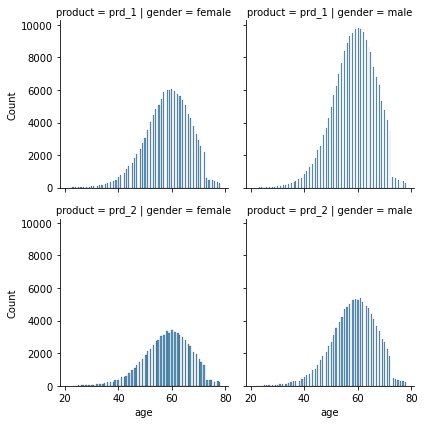

In [95]:
# We can see that over all the data is every distriputed accross the majore catagories.
# I Do not think we will need to scale the data at this point.
print(Customer_df[['age','gender','product']].groupby(['gender','product']).agg(['mean','std','count']))
g = sns.FacetGrid(Customer_df,col='gender',row='product')
g = g.map(sns.histplot,'age')

% 77.9 customers have canceled.


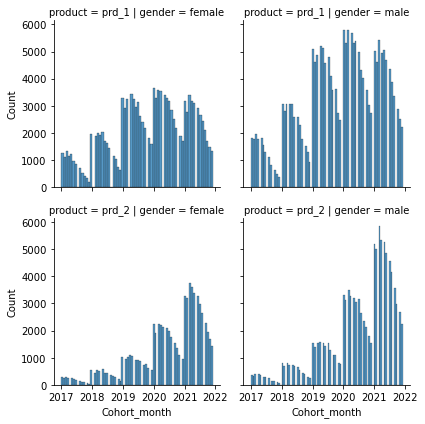

In [98]:
g = sns.FacetGrid(Customer_df,col='gender',row='product')
g = g.map(sns.histplot,'Cohort_month')
#how many customers have canceled there subscription.
print(f"% {100*round(Customer_df['cancel_date_time'].isna().sum()/len(Customer_df.index),3)} customers have canceled.")

# Looking at non-customer Data
## Fed Data

count    60.000000
mean      1.089500
std       0.875229
min       0.050000
25%       0.090000
50%       1.150000
75%       1.850000
max       2.420000
Name: FEDFUNDS, dtype: float64

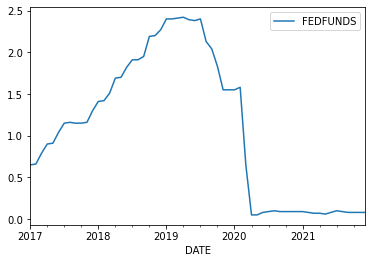

In [112]:
Fed_df = pd.read_csv('prepared_data/FedData.csv',
                     usecols=['DATE','FEDFUNDS'])
Fed_df['DATE'] = pd.to_datetime(Fed_df['DATE'],format='%Y-%m-%d')
Fed_df.plot(x = 'DATE',y = 'FEDFUNDS')
Fed_df['FEDFUNDS'].describe()


   Year month  inflation       Date
0  2012   Jan        2.9 2012-01-01
1  2013   Jan        1.6 2013-01-01
2  2014   Jan        1.6 2014-01-01
3  2015   Jan       -0.1 2015-01-01
4  2016   Jan        1.4 2016-01-01


count    129.000000
mean       2.339535
std        2.077988
min       -0.200000
25%        1.300000
50%        1.800000
75%        2.400000
max        9.100000
Name: inflation, dtype: float64

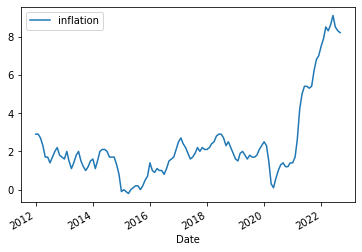

In [119]:
#Looking at CPI index numbe
CPI_df = pd.read_csv('prepared_data/CPI.csv',
                     usecols=['Year','month','inflation','Date'])
CPI_df['Date'] = pd.to_datetime(CPI_df['Date'])
print(CPI_df.head())
CPI_df.plot(x='Date',y='inflation')
CPI_df['inflation'].describe()

      Month  YYYY  ICS_ALL       Date
0   January  2017     98.5 2017-01-01
1  February  2017     96.3 2017-02-01
2     March  2017     96.9 2017-03-01
3     April  2017     97.0 2017-04-01
4       May  2017     97.1 2017-05-01


count     60.000000
mean      90.055000
std       10.386096
min       67.400000
25%       81.075000
50%       95.600000
75%       98.225000
max      101.400000
Name: ICS_ALL, dtype: float64

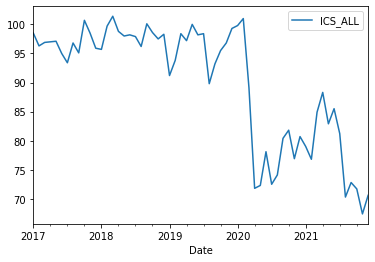

In [124]:
# Looking at ICS numbers
ICS_df = pd.read_csv('prepared_data/ICS.csv',
                     usecols=['Month','YYYY','ICS_ALL','Date'])
ICS_df['Date'] = pd.to_datetime(ICS_df['Date'])
print(ICS_df.head())
ICS_df.plot(x='Date',y = 'ICS_ALL')
ICS_df['ICS_ALL'].describe()